## Milestone 1: Exploring and cleaning the speech command data set

### How Digital Audio Works

Sound travels in waves - fast, periodic pressure variations in a material such as the air around us. Here we briefly introduce the basics of how an analog sound wave is represented as a digital data stream.

#### The WAVE Format

In [1]:
#Import required libraries and define the same variables used in the setup notebook
from pathlib import Path
from IPython.display import Audio
import pandas

current_dir = Path('.')
data_path = current_dir / 'google_speech'
train_audio_path = data_path / 'train' / 'audio'
train_data = pandas.read_csv(data_path / "train" / "train.csv")
example_audio_path = train_audio_path / 'zero' / 'ffd2ba2f_nohash_1.wav'

In [2]:
Audio(example_audio_path)

You are probably familiar with the **Waveform Audio File Format** or **WAV**. It is a standard format for uncompressed digital audio, and also the formta Compact Disks used back in the day. The WAV format uses **Pulse Code Modulation (PCM)** to represent audio, a method for which the **amplitude** of the sound wave is measured (= _sampled_) with a regular frequency - the **sample rate**. Acoordingly, our WAV file contains a linear array of amplitude values and the sampling rate used for recording and playback.

**Task**: _Read the array of samples and sampling rate from a voice command clip using `scipy`_

In [3]:
from scipy.io import wavfile

In [4]:
sample_rate, samples = wavfile.read(example_audio_path)

In [5]:
samples.shape

(16000,)

In [6]:
samples

array([ 2,  1,  3, ..., 28, 31, 31], dtype=int16)

**Task**: _Visualize the entire clip as well as a segment of 15 milliseconds as a line plot_.

In [7]:
import matplotlib.pyplot as plt
import seaborn

seaborn.set_style("whitegrid")
plt.style.use("dark_background")
plt.rcParams['figure.figsize'] = [20.0, 2.0]

<AxesSubplot:>

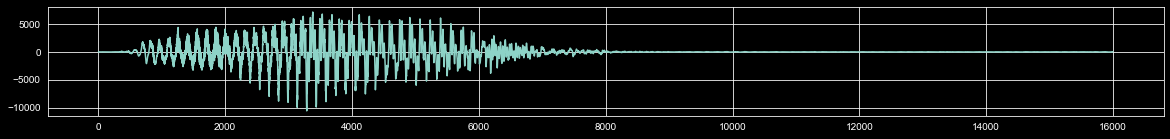

In [8]:
seaborn.lineplot(data=samples)

<StemContainer object of 3 artists>

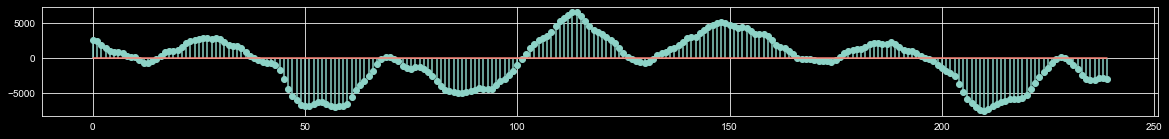

In [9]:
plt.stem(samples[4000:(4000 + 15*16)])

We now understand that digital audio is...
- from the data representation perspective: a one-dimensional numeric array
- in data analysis parlance: a _univariate time series_ with periodic patterns

### Introducing `librosa`

[**librosa**](https://librosa.org) is a Python library for audio and music processing. Among its functions are music-related tools, but also generic audio processing methods, some of which are going to help you with feture engineering.

**Task**: _Use `librosa` to load an audio clip from the dataset. Make sure the original sample rate is used. Then, use the display functionality from librosa to plot a waveform with duration in seconds on the x-axis._

In [10]:
import matplotlib
import librosa

In [11]:
audio, sample_rate  = librosa.load(example_audio_path, sr=None)

In [12]:
from librosa.display import waveshow

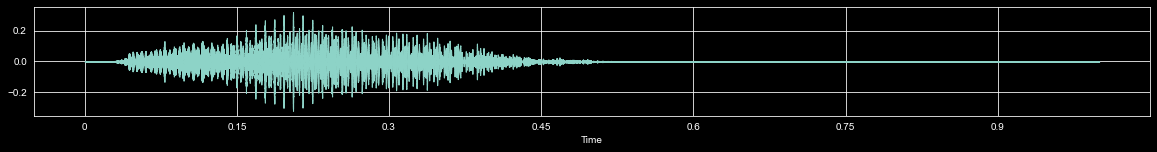

In [13]:
waveshow(audio, sr=sample_rate)

### Exploring the Dataset for Data Cleaning

**Task**: _Append additional columns to the training dataframe: The sample rate, the number of samples, and the the duration in seconds of each audio clip._

In [14]:
def get_audio_info(row):
    file_path = row["file_path"]
    audio, sample_rate  = librosa.load(f"{train_audio_path}/{file_path}", sr=None)
    n_samples = audio.shape[0]
    duration = librosa.get_duration(audio, sr=sample_rate)
    return (sample_rate, n_samples, duration)

In [15]:
%%capture --no-display
train_data[["sample_rate", "samples", "duration [s]"]] = train_data.apply(get_audio_info, axis=1, result_type="expand")

In [16]:
train_data

,file_path,label,file_name,sample_rate,samples,duration [s]
0,bed/00f0204f_nohash_0.wav,bed,00f0204f_nohash_0.wav,16000.0,16000.0,1.000000
1,bed/00f0204f_nohash_1.wav,bed,00f0204f_nohash_1.wav,16000.0,16000.0,1.000000
2,bed/0a7c2a8d_nohash_0.wav,bed,0a7c2a8d_nohash_0.wav,16000.0,16000.0,1.000000
3,bed/0b09edd3_nohash_0.wav,bed,0b09edd3_nohash_0.wav,16000.0,12971.0,0.810688
4,bed/0b56bcfe_nohash_0.wav,bed,0b56bcfe_nohash_0.wav,16000.0,16000.0,1.000000
...,...,...,...,...,...,...
51083,zero/ffd2ba2f_nohash_1.wav,zero,ffd2ba2f_nohash_1.wav,16000.0,16000.0,1.000000
51084,zero/ffd2ba2f_nohash_2.wav,zero,ffd2ba2f_nohash_2.wav,16000.0,16000.0,1.000000
51085,zero/ffd2ba2f_nohash_3.wav,zero,ffd2ba2f_nohash_3.wav,16000.0,16000.0,1.000000
51086,zero/ffd2ba2f_nohash_4.wav,zero,ffd2ba2f_nohash_4.wav,16000.0,16000.0,1.000000


**Task**: _Verify that the clips have a consistent sample rate._

In [17]:
train_data["sample_rate"].value_counts()

16000.0    51088
Name: sample_rate, dtype: int64

**Task**: _Inspect the distribution of the length and duration of the audio clips._

In [18]:
import seaborn

(array([   8.,   17.,  126.,  131.,  318.,  548.,  459.,  988., 1126.,
        1483.]),
 array([ 5945. ,  6948.1,  7951.2,  8954.3,  9957.4, 10960.5, 11963.6,
        12966.7, 13969.8, 14972.9, 15976. ]),
 <BarContainer object of 10 artists>)

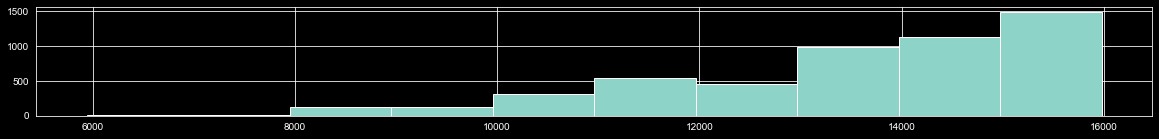

In [19]:
plt.hist(train_data[train_data["samples"] < 16000]["samples"])

In [20]:
train_data[train_data["duration [s]"] < 1.0]

,file_path,label,file_name,sample_rate,samples,duration [s]
3,bed/0b09edd3_nohash_0.wav,bed,0b09edd3_nohash_0.wav,16000.0,12971.0,0.810688
13,bed/0c2d2ffa_nohash_1.wav,bed,0c2d2ffa_nohash_1.wav,16000.0,15019.0,0.938688
21,bed/01b4757a_nohash_1.wav,bed,01b4757a_nohash_1.wav,16000.0,15702.0,0.981375
27,bed/1a4259c3_nohash_0.wav,bed,1a4259c3_nohash_0.wav,16000.0,11889.0,0.743062
28,bed/1a4259c3_nohash_1.wav,bed,1a4259c3_nohash_1.wav,16000.0,13375.0,0.835938
...,...,...,...,...,...,...
51005,zero/f59d0771_nohash_1.wav,zero,f59d0771_nohash_1.wav,16000.0,12288.0,0.768000
51008,zero/f88f97a7_nohash_0.wav,zero,f88f97a7_nohash_0.wav,16000.0,15604.0,0.975250
51035,zero/f21893dc_nohash_0.wav,zero,f21893dc_nohash_0.wav,16000.0,11146.0,0.696625
51063,zero/fbe51750_nohash_0.wav,zero,fbe51750_nohash_0.wav,16000.0,12971.0,0.810688


**Task**: _How can you make sure that the audio clips have a uniform length? Implement a function for this purpose._

In [21]:
import numpy

In [22]:
def pad_audio_with_silence(audio: numpy.ndarray, sample_rate: int, duration: float):
    target_n_samples = int(duration * sample_rate)
    assert audio.shape[0] < target_n_samples
    padded_audio = numpy.zeros(target_n_samples)
    padded_audio[:audio.shape[0]] = audio
    return padded_audio

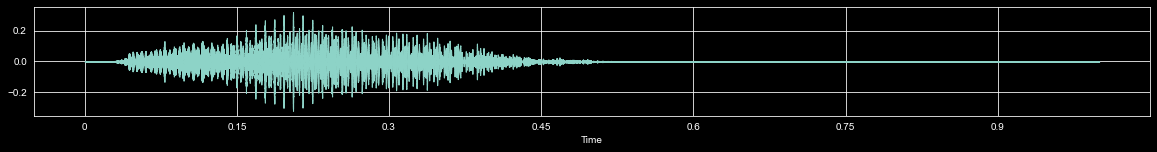

In [23]:
waveshow(audio, sr=16000)

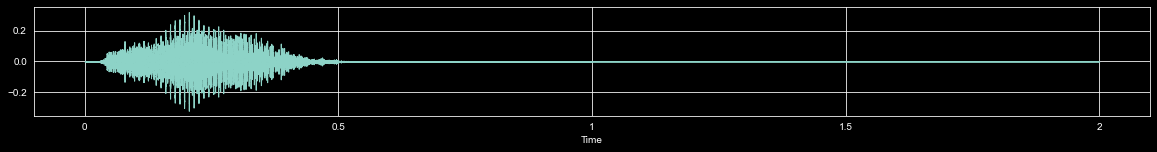

In [24]:
waveshow(pad_audio_with_silence(audio, sample_rate=16000, duration=2), sr=16000)